In [1]:
##Import libraries
import tensorflow as tf

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
## Initialising the CNN
classifier = Sequential()

In [4]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Conv2D(64,(3,3),input_shape = (64,64,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


In [5]:
## Flattening
classifier.add(Flatten())

In [6]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))


In [7]:
#output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [8]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [10]:
## Scaling test data
##no  data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
## Importing training data
train_set = train_datagen.flow_from_directory('helmet_detection\\training',
                                               target_size=(64, 64),
                                               batch_size=32,
                                               class_mode='binary')

Found 647 images belonging to 2 classes.


In [12]:
train_set.class_indices

{'with helmet': 0, 'without helmet': 1}

In [13]:
#which is with helmet which is without helmet?
label_map = (train_set.class_indices)
print(label_map)

{'with helmet': 0, 'without helmet': 1}


In [14]:
from PIL import Image

In [15]:
## Importng test data
test_set = test_datagen.flow_from_directory('helmet_detection\\testing',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 208 images belonging to 2 classes.


In [16]:
## fitting model to images
classifier.fit_generator(
        train_set,
        steps_per_epoch=600,
        epochs=10,
        validation_data=test_set,
        validation_steps=200)




Epoch 1/10





600/600 [==============================] - 83s 138ms/step - loss: 0.2944 - acc: 0.8750 - val_loss: 0.1870 - val_acc: 0.9284
Epoch 2/10
600/600 [==============================] - 83s 138ms/step - loss: 0.0666 - acc: 0.9771 - val_loss: 0.0827 - val_acc: 0.9761
Epoch 3/10
600/600 [==============================] - 94s 157ms/step - loss: 0.0264 - acc: 0.9909 - val_loss: 0.0969 - val_acc: 0.9805
Epoch 4/10
600/600 [==============================] - 99s 166ms/step - loss: 0.0190 - acc: 0.9934 - val_loss: 0.0843 - val_acc: 0.9762
Epoch 5/10
600/600 [==============================] - 86s 144ms/step - loss: 0.0122 - acc: 0.9965 - val_loss: 0.0623 - val_acc: 0.9856
Epoch 6/10
600/600 [==============================] - 83s 139ms/step - loss: 0.0021 - acc: 0.9995 - val_loss: 0.0940 - val_acc: 0.9853
Epoch 7/10
600/600 [==============================] - 95s 158ms/step - loss: 0.0260 - acc: 0.9923 - val_loss: 0.0454 - val_acc: 0.9906
Epoch 8/10
600/600 [===========================

In [17]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('D:\\Photos\\Scanned Copies\\PASSPORT.jpeg'
                           ,target_size =(64,64))


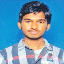

In [18]:
test_image

In [19]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [20]:
## For single prediction change the dimension using axis. To remove problem of batch

test_image=test_image.reshape(1,64,64,3)

In [21]:
result = classifier.predict(test_image)

In [22]:
## Class label of dog and cat

if result == 1:
    prediction = 'with out helmet'
else:
    prediction = 'with  helmet'
    

In [23]:
prediction

'with out helmet'